In [1]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute, SubcatchAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import time

# Local imports.
from urbansurge import swmm_model, analysis_tools

In [2]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Example8\Example8_config.yml"

In [3]:
# Create instance of SWMM model.
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2007-01-01 00:00:00
Start Time: 2007-01-01 12:00:00


Index(['Velocity_C3', 'Velocity_C4', 'Velocity_C5', 'Velocity_C6',
       'Velocity_C7', 'Velocity_C8', 'Velocity_C9', 'Velocity_C10',
       'Velocity_C11', 'Velocity_C_Aux3', 'Velocity_P1', 'Velocity_P2',
       'Velocity_P3', 'Velocity_P4', 'Velocity_P5', 'Velocity_P6',
       'Velocity_I1', 'Velocity_I2', 'Velocity_I3', 'Velocity_I4',
       'Velocity_I5', 'Velocity_I6', 'Velocity_I7', 'Velocity_I8',
       'Velocity_I9', 'Velocity_I10', 'Velocity_I11', 'Velocity_I12',
       'Velocity_I13', 'datetime'],
      dtype='object')
Index(['Depth_C3', 'Depth_C4', 'Depth_C5', 'Depth_C6', 'Depth_C7', 'Depth_C8',
       'Depth_C9', 'Depth_C10', 'Depth_C11', 'Depth_C_Aux3', 'Depth_P1',
       'Depth_P2', 'Depth_P3', 'Depth_P4', 'Depth_P5', 'Depth_P6', 'Depth_I1',
       'Depth_I2', 'Depth_I3', 'Depth_I4', 'Depth_I5', 'Depth_I6', 'Depth_I7',
       'Depth_I8', 'Depth_I9', 'Depth_I10', 'Depth_I11', 'Depth_I12',
       'Depth_I13', 'datetime'],
      dtype='object')


C:\Users\ay434\AppData\Local\Temp\ipykernel_16220\3305108218.py:19: RuntimeWarning: invalid value encountered in divide
  Rh = A / P


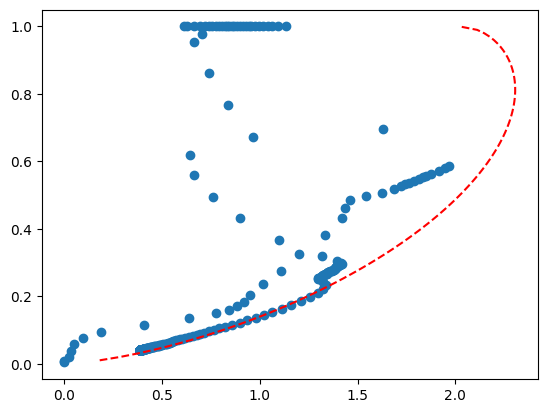

In [18]:
# Plot link depth vs. velocity.
link_vel_df = swmm.get_link_velocity()
link_depth_df = swmm.get_link_depth()

print(link_vel_df.columns)
print(link_depth_df.columns)

# Manning's theoretical.
link_id = 'I1'
link_n = swmm.get_link_roughness(link_id)
link_S = swmm.get_link_slope(link_id)
link_geom = swmm.get_link_geometry(link_id)
link_D = link_geom[0]
C = (1 / link_n) * np.abs(link_S)**(1/2)
link_d = np.linspace(0, link_D, 100)
theta = 2 * np.arccos(1 - (2 * link_d / link_D))
A = (link_D**2 / 8) * (theta - np.sin(theta))
P = link_D * theta / 2
Rh = A / P
v = C * Rh**(2/3)

fig, ax = plt.subplots()
ax.scatter(link_vel_df[f'Velocity_{link_id}'], link_depth_df[f'Depth_{link_id}'])
ax.plot(v, link_d, 'r--')